In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [107]:
df = pd.read_csv('results/processed.tsv', sep='\t')
df

,go_term_ids,name,cutoff,closure,top_n,source,model,method,method_desc,run,...,true_positive_terms,false_positive_terms,false_negative_terms_example20,unparsed_terms,gene_set_size,precision,recall,recall_general,recall_specific,f1_score
0,"{'BFO:0000003', 'GO:0016052', 'GO:0006090', 'G...",glycolysis-gocam-0-0.005,0.005,False,1,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,NaN,NaN,NaN,10,1.000000,1.000000,1.00,1.000000,1.000000
1,"{'BFO:0000003', 'GO:0016052', 'GO:0006090', 'G...",glycolysis-gocam-0-0.005,0.005,False,5,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,GO:0006006,GO:0006090|GO:001605,energy production|atp generation,10,0.500000,0.200000,1.00,0.200000,0.285714
2,"{'BFO:0000003', 'GO:0016052', 'GO:0006090', 'G...",glycolysis-gocam-0-0.005,0.005,False,10,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096,GO:0006006,GO:0006090|GO:001605,energy production|atp generation,10,0.500000,0.100000,0.20,0.200000,0.166667
3,"{'BFO:0000003', 'GO:0016052', 'GO:0006090', 'G...",glycolysis-gocam-0-0.005,0.005,False,25,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096|GO:0006006,NaN,GO:0006090|GO:001605,energy production|atp generation,10,1.000000,0.080000,0.25,0.153846,0.148148
4,"{'BFO:0000003', 'GO:0016052', 'GO:0006090', 'G...",glycolysis-gocam-0-0.005,0.005,False,5000,NONE,4.0,gpt,no_synopsis-4,gpt-4.no_synopsis.v1,...,GO:0006096|GO:0006006,NaN,GO:0006090|GO:001605,energy production|atp generation,10,1.000000,0.051282,0.25,0.142857,0.097561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99355,"{'GO:0006997', 'GO:0023051', 'GO:0048762', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,1,NaN,NaN,NaN,NaN,closure,...,GO:0044283,NaN,NaN,NaN,180,1.000000,1.000000,1.00,1.000000,1.000000
99356,"{'GO:0006997', 'GO:0023051', 'GO:0048762', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,5,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0009749|GO:0019899|GO:0050709|GO...,NaN,NaN,180,0.000794,1.000000,1.00,1.000000,0.001587
99357,"{'GO:0006997', 'GO:0023051', 'GO:0048762', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,10,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0009749|GO:0019899|GO:0050709|GO...,NaN,NaN,180,0.001720,1.000000,1.00,1.000000,0.003434
99358,"{'GO:0006997', 'GO:0023051', 'GO:0048762', 'GO...",HALLMARK_MTORC1_SIGNALING-1-99,99.000,True,25,NaN,NaN,NaN,NaN,closure,...,GO:0044283|GO:0005737|GO:0019752|GO:0036094|GO...,GO:0008525|GO:0019899|GO:0050709|GO:0035094|GO...,NaN,NaN,180,0.004761,1.000000,1.00,1.000000,0.009477


In [108]:
df['has_hit'] = 0
df.loc[df['true_positives'] > 0, 'has_hit'] = 1

In [109]:
df["model"] = df["model"].apply(lambda x: f"GPT-{x}" if not str(x).startswith("GPT") else x)


In [110]:
cmap = {True: "closure", False: "no_closure"}
df["closure"] = df["closure"].apply(lambda x: cmap.get(x, x))

In [111]:
df["closure"].unique()

array(['no_closure', 'closure'], dtype=object)

In [112]:
df["model"].unique()

array(['GPT-4.0', 'GPT-3.5', 'GPT-3.0', 'GPT-nan'], dtype=object)

In [113]:
df_tophit = df.query("top_n == 1 and method=='gpt'")

In [114]:
len(df_tophit.query("true_positives == 0"))

11410

In [115]:
len(df_tophit.query("true_positives > 0"))

4142

In [116]:
df["cutoff"].unique()

array([5.0e-03, 5.0e-02, 9.9e+01])

In [117]:
#df_tophit.df_tophit[df_tophit['true_positives'] > 0, 'has_top_term'] = 1


In [118]:
df_tophit.groupby(["source", "model"]).mean("has_hit").reset_index()[["source", "model", "has_hit"]]

,source,model,has_hit
0,GO,GPT-3.0,0.194444
1,GO,GPT-3.5,0.272569
2,GO,GPT-4.0,0.371528
3,NONE,GPT-3.0,0.144097
4,NONE,GPT-3.5,0.364583
5,NONE,GPT-4.0,0.316551
6,RefSeq,GPT-3.0,0.178819
7,RefSeq,GPT-3.5,0.288194
8,RefSeq,GPT-4.0,0.266204


In [119]:
df.query("top_n==10 and cutoff==0.05 and closure=='closure'").groupby(["source", "model"]).\
mean("has_hit").reset_index()[["source", "model", "has_hit"]]

,source,model,has_hit
0,GO,GPT-3.0,0.614583
1,GO,GPT-3.5,0.697917
2,GO,GPT-4.0,0.864583
3,NONE,GPT-3.0,0.559028
4,NONE,GPT-3.5,0.812500
5,NONE,GPT-4.0,0.798611
6,RefSeq,GPT-3.0,0.517361
7,RefSeq,GPT-3.5,0.739583
8,RefSeq,GPT-4.0,0.756944


In [120]:
def himax(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.sort_values(by=by, ascending=ascending).style.hide().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)


In [206]:
def himax_all(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values
    """
    # Calculate standard deviation for each numeric column and add as new columns
    for col in tbl.select_dtypes(include=[np.number]).columns:
        if col != 'model':
            tbl[col] = tbl[col].astype(str) + ' ± ' + tbl[col + ' st.dev.'].astype(str)

    # Drop the standard deviation columns
    tbl = tbl.drop([col for col in tbl.columns if 'st.dev.' in col], axis=1)

    # Sort, hide index, highlight max, and format
    return tbl.sort_values(by=by, ascending=ascending).style.hide_index().highlight_max(subset=tbl.columns[1:], axis=0, props='font-weight:bold').format(precision=3)

metrics = ["precision", "recall", "f1_score", "has_hit"]
grp = df.query("model != 'GPT-nan'").groupby(["model"])

# Ensure only numeric columns are considered
numeric_cols = df.select_dtypes(include=[np.number]).columns.intersection(metrics)

# Calculate mean and standard deviation
mean_df = grp[numeric_cols].mean().reset_index()
std_df = grp[numeric_cols].std().reset_index()

# Rename std columns and merge with mean dataframe
std_df.rename(columns={col: col + ' st.dev.' for col in numeric_cols}, inplace=True)
result_df = pd.merge(mean_df, std_df, on=["model"])

# Apply the himax_all function
himax_all(result_df, by=["model"])


KeyError: 'precision st.dev. st.dev.'

In [121]:
def has_hit_summary(top_n=10, cutoff=0.05, closure='closure'):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])
    return grp.mean("has_hit").reset_index()[["source", "model", "has_hit"]]
    

In [183]:
def has_hit_summary_std(top_n=10, cutoff=0.05, closure='closure'):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'").copy()

    # Ensure 'has_hit' is numeric
    df_subset.loc[:, 'has_hit'] = pd.to_numeric(df_subset['has_hit'], errors='coerce')

    grp = df_subset.groupby(["source", "model"])

    # Calculate mean and standard deviation
    mean_df = grp.mean()["has_hit"].reset_index()
    std_df = grp.std()["has_hit"].reset_index()

    # Add standard deviation as a new column
    mean_df["has_hit st. dev."] = std_df["has_hit"]

    return mean_df[["source", "model", "has_hit", "has_hit st. dev."]]

def himax_has_hit_std(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.sort_values(by=by, ascending=ascending).style.hide_index().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)

# Example usage
himax_has_hit_std(has_hit_summary_std(10, 0.05, 'closure'))


TypeError: agg function failed [how->mean,dtype->object]

In [122]:
himax(has_hit_summary(10, 0.05, 'closure'))

source,model,has_hit
GO,GPT-3.0,0.615
NONE,GPT-3.0,0.559
RefSeq,GPT-3.0,0.517
GO,GPT-3.5,0.698
NONE,GPT-3.5,0.812
RefSeq,GPT-3.5,0.740
GO,GPT-4.0,0.865
NONE,GPT-4.0,0.799
RefSeq,GPT-4.0,0.757


In [123]:
himax(has_hit_summary(10, 0.05, 'no_closure'))

source,model,has_hit
GO,GPT-3.0,0.260
NONE,GPT-3.0,0.222
RefSeq,GPT-3.0,0.260
GO,GPT-3.5,0.410
NONE,GPT-3.5,0.535
RefSeq,GPT-3.5,0.462
GO,GPT-4.0,0.583
NONE,GPT-4.0,0.503
RefSeq,GPT-4.0,0.399


In [124]:
himax(has_hit_summary(1, 0.05, 'closure'), by=["has_hit"], ascending=False)

source,model,has_hit
GO,GPT-4.0,0.580
NONE,GPT-3.5,0.531
NONE,GPT-4.0,0.493
RefSeq,GPT-3.5,0.431
RefSeq,GPT-4.0,0.420
GO,GPT-3.5,0.392
GO,GPT-3.0,0.292
RefSeq,GPT-3.0,0.267
NONE,GPT-3.0,0.212


In [125]:
himax(has_hit_summary(1, 0.05, 'no_closure'), by=["has_hit"], ascending=False)

source,model,has_hit
NONE,GPT-3.5,0.198
GO,GPT-4.0,0.163
GO,GPT-3.5,0.153
RefSeq,GPT-3.5,0.146
NONE,GPT-4.0,0.139
RefSeq,GPT-4.0,0.111
GO,GPT-3.0,0.097
RefSeq,GPT-3.0,0.090
NONE,GPT-3.0,0.076


In [126]:
def pivot_tbl(tbl, cols=['closure', 'top_n', 'cutoff'], metric='has_hit', query={}) -> pd.DataFrame:
    filtered = tbl.copy()
    if query:
        for k, v in query.items():
            if isinstance(v, list):
                filtered = filtered[filtered[k].isin(v)]
            else:
                filtered = filtered[filtered[k] == v]
    pivoted = filtered.pivot_table(index=['source', 'model'], columns=cols , values=metric, aggfunc='mean').\
    reset_index()
    return himax(pivoted)

pivot_tbl(df, cols=['closure', 'top_n'], query={"cutoff": 0.05, "top_n": [1, 5, 10, 25]})

In [127]:
#pivot_tbl(df, cols=['top_n'], query={"cutoff": 0.05, "top_n": [1], "closure": "closure"}).sort_values(by=1)

In [128]:
# megapivot
pivot_tbl(df)

In [129]:
df.query("top_n == 1")["cutoff"].unique()

array([5.0e-03, 5.0e-02, 9.9e+01])

In [130]:
df.query("top_n == 1 and closure=='closure' and cutoff==99.0").groupby(["model", "source", "cutoff"]).mean("has_hit").\
 reset_index()[["source", "model", "cutoff", "has_hit"]]

,source,model,cutoff,has_hit
0,GO,GPT-3.0,99.0,0.291667
1,NONE,GPT-3.0,99.0,0.211806
2,RefSeq,GPT-3.0,99.0,0.267361
3,GO,GPT-3.5,99.0,0.392361
4,NONE,GPT-3.5,99.0,0.531250
5,RefSeq,GPT-3.5,99.0,0.430556
6,GO,GPT-4.0,99.0,0.579861
7,NONE,GPT-4.0,99.0,0.496528
8,RefSeq,GPT-4.0,99.0,0.423611


In [131]:
pivot_tbl(df, metric='precision')

In [132]:
pivot_tbl(df, metric='recall')

In [133]:
pivot_tbl(df, metric='f1_score')

In [173]:
def outcomes_summary(top_n=10, cutoff=0.05, closure='closure', metrics=["precision", "recall", "f1_score", "has_hit"]):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])
    return grp.mean(metrics).reset_index()[["source", "model"] + metrics]

In [188]:
def himax(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values
    """
    tbl_subset = tbl.select_dtypes(include=[np.number]).columns
    return tbl.sort_values(by=by, ascending=ascending).style.hide().highlight_max(subset=tbl_subset, axis=0, props='font-weight:bold').format(precision=3)


himax(outcomes_summary(cutoff=0.005))

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.247,0.206,0.205,0.615
NONE,GPT-3.0,0.323,0.167,0.203,0.531
RefSeq,GPT-3.0,0.256,0.172,0.194,0.507
GO,GPT-3.5,0.459,0.271,0.317,0.691
NONE,GPT-3.5,0.535,0.375,0.418,0.795
RefSeq,GPT-3.5,0.500,0.312,0.365,0.715
GO,GPT-4.0,0.473,0.376,0.401,0.847
NONE,GPT-4.0,0.493,0.338,0.382,0.781
RefSeq,GPT-4.0,0.454,0.299,0.344,0.729


In [172]:
himax(outcomes_summary(cutoff=0.05))

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.252,0.200,0.208,0.615
NONE,GPT-3.0,0.339,0.171,0.211,0.559
RefSeq,GPT-3.0,0.261,0.172,0.196,0.517
GO,GPT-3.5,0.467,0.265,0.318,0.698
NONE,GPT-3.5,0.543,0.371,0.420,0.812
RefSeq,GPT-3.5,0.517,0.310,0.368,0.740
GO,GPT-4.0,0.486,0.374,0.408,0.865
NONE,GPT-4.0,0.507,0.336,0.386,0.799
RefSeq,GPT-4.0,0.471,0.304,0.354,0.757


In [202]:
def has_hit_summary_std(top_n=10, cutoff=0.05, closure='closure'):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'").copy()

    # Convert 'has_hit' to numeric, dropping non-numeric rows
    df_subset['has_hit'] = pd.to_numeric(df_subset['has_hit'], errors='coerce')
    df_subset.dropna(subset=['has_hit'], inplace=True)

    grp = df_subset.groupby(["source", "model"])

    # Calculate mean and standard deviation
    mean_df = grp['has_hit'].mean().reset_index()
    std_df = grp['has_hit'].std().reset_index()

    # Combine mean and standard deviation into a single string using a different symbol
    mean_df['has_hit'] = mean_df['has_hit'].round(3).astype(str) + ' ± ' + std_df['has_hit'].round(3).astype(str)

    # Rename columns
    mean_df.rename(columns={"source": "Source", "model": "Model", "has_hit": "Has Top Hit"}, inplace=True)

    # Create a temporary column for sorting
    mean_df['temp_sort'] = mean_df['Has Top Hit'].str.extract(r'([0-9.]+)').astype(float)

    # Sort by the temporary column in descending order
    mean_df.sort_values(by='temp_sort', ascending=False, inplace=True)

    # Drop the temporary column
    mean_df.drop(columns=['temp_sort'], inplace=True)

    return mean_df[["Source", "Model", "Has Top Hit"]]

def himax(tbl: pd.DataFrame):
    """
    Prepare a table for publication, highlighting maximum values in 'Has Top Hit' column
    """
    # Apply custom styling to highlight the maximum value in 'Has Top Hit' column
    def highlight_max(s):
        is_max = s == s.max()
        return ['font-weight: bold' if v else '' for v in is_max]

    styled_tbl = tbl.style.apply(highlight_max, subset=['Has Top Hit'])
    return styled_tbl.hide().format(precision=3)

# Example usage
himax(has_hit_summary_std(10, 0.05, 'closure'))


Source,Model,Has Top Hit
GO,GPT-4.0,0.865 ± 0.343
NONE,GPT-3.5,0.812 ± 0.391
NONE,GPT-4.0,0.799 ± 0.402
RefSeq,GPT-4.0,0.757 ± 0.43
RefSeq,GPT-3.5,0.74 ± 0.44
GO,GPT-3.5,0.698 ± 0.46
GO,GPT-3.0,0.615 ± 0.488
NONE,GPT-3.0,0.559 ± 0.497
RefSeq,GPT-3.0,0.517 ± 0.501


In [187]:

def outcomes_summary_std_format(top_n=10, cutoff=0.05, closure='closure', metrics=["precision", "recall", "f1_score", "has_hit"]):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])

    # Ensure that metrics only contain numeric columns
    numeric_metrics = [col for col in metrics if pd.api.types.is_numeric_dtype(df_subset[col])]

    # Calculate mean and standard deviation for numeric metrics
    mean_df = grp[numeric_metrics].mean().reset_index()
    std_df = grp[numeric_metrics].std().reset_index()

    # Combine mean and standard deviation into a single string
    for col in numeric_metrics:
        print(col)
        mean_df[col] = mean_df[col].round(3).astype(str) + ' ± <span style="font-size:smaller;">' + std_df[col].round(3).astype(str) + '</span>'

    return mean_df[["source", "model"] + numeric_metrics]

def himax_std(tbl: pd.DataFrame, by=["model", "source"], ascending=True):
    """
    Prepare a table for publication, highlighting maximum values and adjusting font size for standard deviation.
    """
    # Extract numeric part of the mean and standard deviation for comparison
    tbl_numeric = tbl.copy()
    for col in tbl.columns:
        if col not in by:
            tbl_numeric[col] = tbl[col].str.extract(r'([0-9.]+) ±')[0].astype(float)

    # Function to apply custom styling
    def custom_style(row):
        styles = []
        for col in tbl.columns:
            if col not in by and ' ± ' in str(row[col]):
                parts = row[col].split(' ± ')
                mean = float(parts[0])
                std_dev_str = parts[1].split('<')[0] if len(parts) > 1 and parts[1] else '0'
                std_dev = float(std_dev_str) if std_dev_str else 0  # Extract std_dev before '<span>'
                max_mean = tbl_numeric[col].max()
                second_max = tbl_numeric[col].nlargest(2).iloc[-1]

                # Check if the current mean is the max or within the range of the max when considering std_dev
                if mean == max_mean or (mean + std_dev >= max_mean and mean == second_max):
                    styles.append('font-weight: bold')
                else:
                    styles.append('')
            else:
                styles.append('')
        return styles

    # Apply custom styling and sort
    styled_tbl = tbl.style.apply(custom_style, axis=1)
    return styled_tbl.format(precision=3)

himax_std(outcomes_summary_std_format(cutoff=0.05))


precision
recall
f1_score
has_hit


,source,model,precision,recall,f1_score,has_hit
0,GO,GPT-3.0,0.252 ± 0.266,0.2 ± 0.225,0.208 ± 0.22,0.615 ± 0.488
1,GO,GPT-3.5,0.467 ± 0.371,0.265 ± 0.256,0.318 ± 0.278,0.698 ± 0.46
2,GO,GPT-4.0,0.486 ± 0.286,0.374 ± 0.258,0.408 ± 0.253,0.865 ± 0.343
3,NONE,GPT-3.0,0.339 ± 0.363,0.171 ± 0.21,0.211 ± 0.238,0.559 ± 0.497
4,NONE,GPT-3.5,0.543 ± 0.343,0.371 ± 0.278,0.42 ± 0.28,0.812 ± 0.391
5,NONE,GPT-4.0,0.507 ± 0.333,0.336 ± 0.269,0.386 ± 0.275,0.799 ± 0.402
6,RefSeq,GPT-3.0,0.261 ± 0.308,0.172 ± 0.225,0.196 ± 0.24,0.517 ± 0.501
7,RefSeq,GPT-3.5,0.517 ± 0.38,0.31 ± 0.276,0.368 ± 0.295,0.74 ± 0.44
8,RefSeq,GPT-4.0,0.471 ± 0.342,0.304 ± 0.264,0.354 ± 0.277,0.757 ± 0.43


In [158]:
himax_std(outcomes_summary_std_format(cutoff=99))

,source,model,precision,recall,f1_score,has_hit
0,GO,GPT-3.0,0.256 ± 0.267,0.198 ± 0.22,0.209 ± 0.22,0.625 ± 0.485
1,GO,GPT-3.5,0.473 ± 0.37,0.258 ± 0.244,0.316 ± 0.271,0.708 ± 0.455
2,GO,GPT-4.0,0.494 ± 0.284,0.368 ± 0.247,0.408 ± 0.249,0.878 ± 0.327
3,NONE,GPT-3.0,0.345 ± 0.361,0.169 ± 0.208,0.212 ± 0.235,0.576 ± 0.495
4,NONE,GPT-3.5,0.546 ± 0.34,0.365 ± 0.273,0.416 ± 0.276,0.819 ± 0.385
5,NONE,GPT-4.0,0.512 ± 0.329,0.332 ± 0.264,0.384 ± 0.271,0.812 ± 0.391
6,RefSeq,GPT-3.0,0.269 ± 0.31,0.174 ± 0.224,0.199 ± 0.239,0.531 ± 0.5
7,RefSeq,GPT-3.5,0.519 ± 0.378,0.305 ± 0.273,0.364 ± 0.292,0.747 ± 0.436
8,RefSeq,GPT-4.0,0.48 ± 0.336,0.303 ± 0.259,0.355 ± 0.27,0.778 ± 0.416


In [162]:
himax(outcomes_summary(cutoff=0.005))

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.247,0.206,0.205,0.615
NONE,GPT-3.0,0.323,0.167,0.203,0.531
RefSeq,GPT-3.0,0.256,0.172,0.194,0.507
GO,GPT-3.5,0.459,0.271,0.317,0.691
NONE,GPT-3.5,0.535,0.375,0.418,0.795
RefSeq,GPT-3.5,0.500,0.312,0.365,0.715
GO,GPT-4.0,0.473,0.376,0.401,0.847
NONE,GPT-4.0,0.493,0.338,0.382,0.781
RefSeq,GPT-4.0,0.454,0.299,0.344,0.729


In [ ]:
metrics = ["precision", "recall", "f1_score", "has_hit"]
grp = df.query("model != 'GPT-nan'").groupby(["model"])
himax(grp.mean(metrics).reset_index()[["model"] + metrics], by=["model"])

In [141]:
himax(outcomes_summary(cutoff=0.005))

source,model,precision,recall,f1_score,has_hit
GO,GPT-3.0,0.247,0.206,0.205,0.615
NONE,GPT-3.0,0.323,0.167,0.203,0.531
RefSeq,GPT-3.0,0.256,0.172,0.194,0.507
GO,GPT-3.5,0.459,0.271,0.317,0.691
NONE,GPT-3.5,0.535,0.375,0.418,0.795
RefSeq,GPT-3.5,0.500,0.312,0.365,0.715
GO,GPT-4.0,0.473,0.376,0.401,0.847
NONE,GPT-4.0,0.493,0.338,0.382,0.781
RefSeq,GPT-4.0,0.454,0.299,0.344,0.729


In [ ]:
himax_std(outcomes_summary(cutoff=0.005))

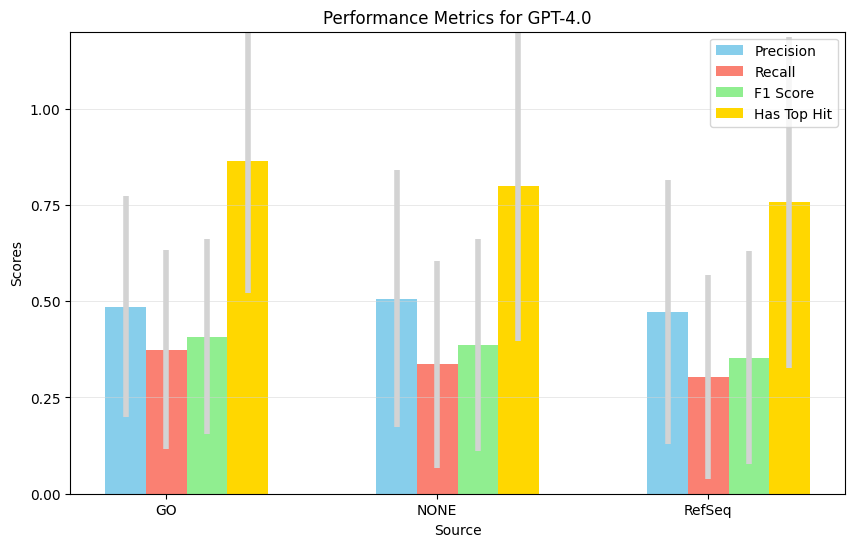

In [180]:

def outcomes_summary_std_format_plot(top_n=10, cutoff=0.05, closure='closure', metrics=["precision", "recall", "f1_score", "has_hit"]):
    df_subset = df.query(f"top_n=={top_n} and cutoff=={cutoff} and closure=='{closure}'")
    grp = df_subset.groupby(["source", "model"])

    # Ensure that metrics only contain numeric columns
    numeric_metrics = [col for col in metrics if pd.api.types.is_numeric_dtype(df_subset[col])]

    # Calculate mean and standard deviation for numeric metrics
    mean_df = grp[numeric_metrics].mean().reset_index()
    std_df = grp[numeric_metrics].std().reset_index()

    return mean_df, std_df

def plot_model_performance_separated(data, std_data, model_filter, name):
    """
    Function to plot the performance metrics (precision, recall, f1_score) for a specific model with error bars.
    Each metric is grouped separately for clarity.

    :param data: DataFrame containing the mean performance data.
    :param std_data: DataFrame containing the standard deviation of the performance data.
    :param model_filter: The specific model to filter the data.
    """
    # Filtering the data for the specified model
    filtered_data = data[data['model'] == model_filter]
    filtered_std = std_data[std_data['model'] == model_filter]

    # Setting up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Defining bar width and positions
    bar_width = 0.15
    r1 = range(len(filtered_data))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Error bar settings
    error_kw = {'capsize': 0, 'capthick': 0, 'elinewidth': 4, 'ecolor': 'lightgray'}

    # Plotting each metric in a separate group with error bars
    ax.bar(r1, filtered_data['precision'], yerr=filtered_std['precision'], width=bar_width, color='skyblue', label='Precision', error_kw=error_kw)
    ax.bar(r2, filtered_data['recall'], yerr=filtered_std['recall'], width=bar_width, color='salmon', label='Recall', error_kw=error_kw)
    ax.bar(r3, filtered_data['f1_score'], yerr=filtered_std['f1_score'], width=bar_width, color='lightgreen', label='F1 Score', error_kw=error_kw)
    ax.bar(r4, filtered_data['has_hit'], yerr=filtered_std['has_hit'], width=bar_width, color='gold', label='Has Top Hit', error_kw=error_kw)

    # Adding labels and title
    ax.set_xlabel('Source')
    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Metrics for {model_filter}')
    ax.set_xticks([r + bar_width for r in range(len(filtered_data))])
    ax.set_xticklabels(filtered_data['source'])
    ax.legend()
    y_ticks = [0, 0.25, 0.5, 0.75, 1.0]  # Define your custom ticks here
    ax.set_yticks(y_ticks)
    ax.grid(axis="y", color='lightgray', alpha=0.7, which='both', linestyle='-', linewidth=0.5)
    ax.set_ylim(0, 1.2)  # Adjust the y-axis limit to ensure all data is shown

    plt.savefig(f"output/performance-{name}.png")
    plt.savefig(f"output/performance-{name}.pdf")
    plt.show()

# Example usage
mean_data, std_data = outcomes_summary_std_format_plot(cutoff=0.05)
plot_model_performance_separated(mean_data, std_data, 'GPT-4.0', 'gpt-4-0_05')

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_model_performance_separated(data, model_filter, name):
    """
    Function to plot the performance metrics (precision, recall, f1_score) for a specific model.
    Each metric is grouped separately for clarity.

    :param data: DataFrame containing the performance data.
    :param model_filter: The specific model to filter the data.
    """
    # Filtering the data for the specified model
    filtered_data = data[data['model'] == model_filter]

    # Setting up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Defining bar width and positions
    bar_width = 0.15
    r1 = range(len(filtered_data))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Plotting each metric in a separate group
    ax.bar(r1, filtered_data['precision'], width=bar_width, color='skyblue', label='Precision')
    ax.bar(r2, filtered_data['recall'], width=bar_width, color='salmon', label='Recall')
    ax.bar(r3, filtered_data['f1_score'], width=bar_width, color='lightgreen', label='F1 Score')
    ax.bar(r4, filtered_data['has_hit'], width=bar_width, color='gold', label='Has Hit')


    # Adding labels and title
    ax.set_xlabel('Source')
    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Metrics for {model_filter}')
    ax.set_xticks([r + bar_width for r in range(len(filtered_data))])
    ax.set_xticklabels(filtered_data['source'])
    ax.legend()
    ax.grid(axis="y")
    plt.savefig(f"output/performance-{name}.png")
    plt.show()

# Assuming 'df' is the DataFrame containing your data
plot_model_performance_separated(outcomes_summary(cutoff=0.005), ['GPT-4.0','GPT-3.5','GPT-3.0'], ['gpt-4-0_005','gpt-3-5_005','gpt-3-0_005'])


ValueError: ('Lengths must match to compare', (9,), (3,))

In [ ]:
#df_filtered = df.query("cutoff == 0.05 and top_n.isin([1, 5, 10, 25])")
df_filtered = df
pivoted = df_filtered.pivot_table(index=['source', 'model'], columns=['closure', 'top_n', 'cutoff'] , values='has_hit', aggfunc='mean').reset_index()
himax(pivoted)

In [ ]:
pivoted = df_filtered.pivot_table(index=['source', 'model'], columns=['closure', 'top_n'] , values='recall', aggfunc='mean').reset_index()
himax(pivoted)